In [590]:
import pandas as pd
import numpy as np
import pandas_ta as ta
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
from copy import deepcopy

In [591]:
ts = TimeSeries(key='IX5ZSV7I3UUZ3I5B', output_format='csv')

In [592]:
from time import sleep

In [607]:
ticker = 'AAPL'
interval = '30min'
dfs = []
for i in range(2):
    for j in range(12):
        data_reader, _ = ts.get_intraday_extended(ticker, interval=interval, slice=f'year{i+1}month{j+1}')
        df = pd.DataFrame(data_reader)
        df, df.columns = df[1:] , df.iloc[0]
        
        df['time'] = pd.to_datetime(df['time'])
        for c in ['open','high','low','close','volume']:
            df[c] = pd.to_numeric(df[c])
            
        df = df.set_index('time').between_time('09:30:00','16:00:00').sort_index()
        df['date'] = pd.to_datetime(df.index.date)
        df = df.reset_index()
        
        dfs.append(df)
        sleep(13)

In [608]:
len(dfs)

24

In [609]:
df = pd.concat(dfs)

In [610]:
date_range = pd.date_range(df['time'].dt.date.min(), df['time'].dt.date.max())
index = np.arange(1,len(date_range)+1)
date_range_df = pd.DataFrame({
    'date': date_range,
    'day_index': index
})

df = df.merge(date_range_df, on='date', how='left')
df = df.sort_values('time')

In [611]:
df.head()

,time,open,high,low,close,volume,date,day_index
6639,2019-02-11 09:30:00,41.977081,41.984438,41.893706,41.930489,152272,2019-02-11,1
6640,2019-02-11 10:00:00,41.945202,41.984438,41.543038,41.740785,12526440,2019-02-11,1
6641,2019-02-11 10:30:00,41.741668,41.859374,41.702432,41.793165,8449180,2019-02-11,1
6642,2019-02-11 11:00:00,41.800521,41.842209,41.690196,41.717146,5941984,2019-02-11,1
6643,2019-02-11 11:30:00,41.719598,41.729407,41.535682,41.601156,6096172,2019-02-11,1


In [616]:
filename = f"{ticker}_{interval}_{df['date'].min().strftime('%Y-%m-%d')}_{df['date'].max().strftime('%Y-%m-%d')}.pkl"
df.reset_index(drop=True).to_pickle(filename)

In [125]:
data_reader, _ = ts.get_intraday_extended('SPY', interval='30min', slice='year1month2')

In [126]:
df = pd.DataFrame(data_reader)
df, df.columns = df[1:] , df.iloc[0]

In [127]:
df['time'] = pd.to_datetime(df['time'])
for c in ['open','high','low','close','volume']:
    df[c] = pd.to_numeric(df[c])

In [128]:
df = df.set_index('time').between_time('09:30:00','16:00:00').sort_index()

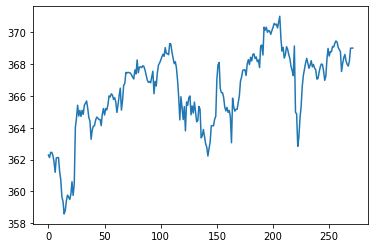

In [129]:
df.reset_index(drop=True)['close'].plot()

In [130]:
df2 = df.copy()
df2['date'] = pd.to_datetime(df2.index.date)

In [131]:
df2

,open,high,low,close,volume,date
time,,,,,,
2020-11-27 09:30:00,362.279532,362.598169,362.279532,362.279532,122465,2020-11-27
2020-11-27 10:00:00,362.289490,362.598169,361.970853,362.127184,4009912,2020-11-27
2020-11-27 10:30:00,362.130172,362.628041,362.050512,362.448808,5079658,2020-11-27
2020-11-27 11:00:00,362.458765,362.588211,362.309404,362.448808,2168106,2020-11-27
2020-11-27 11:30:00,362.428893,362.578254,362.130172,362.249660,2306981,2020-11-27
...,...,...,...,...,...,...
2020-12-24 12:00:00,367.989900,368.150000,367.625000,367.870000,2319877,2020-12-24
2020-12-24 12:30:00,367.880000,368.210000,367.450000,368.190000,2568752,2020-12-24
2020-12-24 13:00:00,368.210000,369.010000,368.160000,368.989900,6807531,2020-12-24


In [132]:
date_range = pd.date_range(df2.index.date.min(), df2.index.date.max())
index = np.arange(1,len(date_range)+1)
date_range_df = pd.DataFrame({
    'date': date_range,
    'day_index': index
})

In [133]:
df2 = df2.reset_index().merge(date_range_df, on='date', how='left')

In [134]:
df2

,time,open,high,low,close,volume,date,day_index
0,2020-11-27 09:30:00,362.279532,362.598169,362.279532,362.279532,122465,2020-11-27,1
1,2020-11-27 10:00:00,362.289490,362.598169,361.970853,362.127184,4009912,2020-11-27,1
2,2020-11-27 10:30:00,362.130172,362.628041,362.050512,362.448808,5079658,2020-11-27,1
3,2020-11-27 11:00:00,362.458765,362.588211,362.309404,362.448808,2168106,2020-11-27,1
4,2020-11-27 11:30:00,362.428893,362.578254,362.130172,362.249660,2306981,2020-11-27,1
...,...,...,...,...,...,...,...,...
267,2020-12-24 12:00:00,367.989900,368.150000,367.625000,367.870000,2319877,2020-12-24,28
268,2020-12-24 12:30:00,367.880000,368.210000,367.450000,368.190000,2568752,2020-12-24,28
269,2020-12-24 13:00:00,368.210000,369.010000,368.160000,368.989900,6807531,2020-12-24,28
270,2020-12-24 13:30:00,368.970000,369.030000,368.970000,369.000000,686475,2020-12-24,28


In [135]:
df2.to_pickle('SPY_year1month2.pkl')

In [618]:
ts = pd.read_pickle('AAPL_30min_2019-02-11_2021-01-29.pkl')

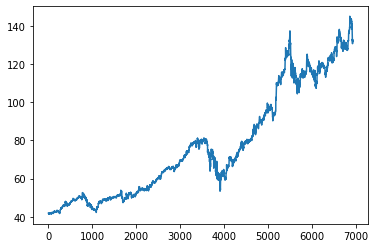

In [619]:
ts['close'].plot()

In [269]:
starting_cash = 50
starting_shares = TRADER_START_AMT / ts.iloc[0]['close']
starting_value = TRADER_START_AMT

In [270]:
strat = init_strategy()

In [271]:
strat = {'inc_trigger_pct': 0.008,
 'inc_trigger_sell_shares_pct': 0.2,
 'dec_trigger_pct': 0.005,
 'dec_trigger_buy_shares_pct': 0.6}

In [272]:
strat

{'inc_trigger_pct': 0.008,
 'inc_trigger_sell_shares_pct': 0.2,
 'dec_trigger_pct': 0.005,
 'dec_trigger_buy_shares_pct': 0.6}

In [273]:
closes_days = ts.iloc[1:-1][['close', 'day_index']].values

In [282]:
cash = starting_cash
shares = starting_shares
value = starting_value

In [283]:
value

100

In [284]:
# TODO fix day trading logic to allow for multiple buys in a day but only one sell per day

In [285]:
# day_idx_last_sell = 0
num_buys = 0
num_sells = 0
for close, day_idx in closes_days:
    pct_change = (close*shares)/value - 1
#     print(day_idx, np.round(close,2), np.round(pct_change,3))
    
    if pct_change >= strat['inc_trigger_pct']:
#         if day_idx_last_buy < day_idx:
#         print('SELL')
        num_sell_shares = strat['inc_trigger_sell_shares_pct']*shares
        cash += num_sell_shares*close
        shares -= num_sell_shares
        value = shares*close

        num_sells += 1
            
#             day_idx_last_sell = day_idx
        
#         print(f'Shares/Cash: {np.round(shares,4)}/{np.round(cash,2)}')
#         print('Total Value:', np.round(shares*close + cash,2))
    
    if pct_change <= -strat['dec_trigger_pct']:
            
            num_buy_shares = strat['dec_trigger_buy_shares_pct']*shares
            cash_needed = num_buy_shares*close
            if cash_needed > cash:
                num_buy_shares = cash/close
            
            if np.round(num_buy_shares, 3) == 0:
                continue
            
#             print('BUY')
            num_buys += 1
            
            cash -= num_buy_shares*close
            shares += num_buy_shares
            value = shares*close
        
#             print(f'Shares/Cash: {np.round(shares,4)}/{np.round(cash,2)}')
#             print('Total Value:', np.round(shares*close + cash,2))
            
# print(f'# Buys/Sells: {num_buys}/{num_sells}')

In [286]:
ending_value = (shares * ts.iloc[-1]['close']) + cash
roi = ending_value/(starting_value+starting_cash) - 1
ending_value, roi

(153.13459654018615, 0.020897310267907754)

In [353]:
ending_value = ts.iloc[-1]['close'] * ((starting_value+starting_cash) / ts.iloc[0]['close'])
roi = ending_value/(starting_value+starting_cash) - 1
ending_value, roi

(152.78257550672734, 0.018550503378182315)

In [268]:
0.024277391621-0.01855050337

0.0057268882510000015

In [574]:
TRADER_START_VALUE = 100
TRADER_START_CASH = 100
POP_SIZE = 100
NUM_EPOCHS = 250
NUM_ELITES = 3

In [555]:
def init_strategy():
    strat = {
        'inc_trigger_pct': np.random.uniform(low=0.001, high=0.1),
        'inc_trigger_sell_shares_pct': np.random.uniform(low=0.001, high=0.1),
        'dec_trigger_pct': np.random.uniform(low=0.001, high=0.1),
        'dec_trigger_buy_shares_pct': np.random.uniform(low=0.001, high=0.1),
    }
    for k in strat.keys():
        strat[k] = np.round(strat[k],4)
    
    return strat

In [556]:
# https://novelinvestor.com/choose-right-default-cost-basis-method/
# https://www.investopedia.com/terms/c/costbasis.asp
# Avg Cost Basis for Funds
# Highest Cost basis may be best for frequent trades...will need to probably test multiple methods for stocks
# Write code for highest cost basis with stock lots
# Tax optimizations??

In [557]:
def calc_highest_cost_basis_gain_loss(num_shares, curr_price, share_lots):
    if num_shares > np.sum([s['num_shares'] for s in share_lots]):
        raise ValueError('Cannot sell more shares than bought!')

    sorted_cost_bases = sorted(share_lots, key=lambda x: -x['cost_basis'])
    lot_matchups = []
    shares_left_to_apply = num_shares
    for cost_basis in sorted_cost_bases:
        applicable_shares = 0
        applicable_cost_basis = cost_basis['cost_basis']
        
        if cost_basis['num_shares'] >= shares_left_to_apply:
            applicable_shares = shares_left_to_apply
            cost_basis['num_shares'] -= applicable_shares
            shares_left_to_apply -= applicable_shares
            
            lot_matchups.append((applicable_shares, applicable_cost_basis))
        else:
            applicable_shares = cost_basis['num_shares']
            cost_basis['num_shares'] -= applicable_shares
            shares_left_to_apply -= applicable_shares
            
            lot_matchups.append((applicable_shares, applicable_cost_basis))
            
        if shares_left_to_apply == 0:
            break
    
    total_gain_loss = 0
    for lot_matchup in lot_matchups:
        
        sale_proceeds = lot_matchup[0]*curr_price
        sale_cost_basis = lot_matchup[0]*lot_matchup[1]
        total_gain_loss += sale_proceeds - sale_cost_basis
        
    return total_gain_loss

def clean_share_lots(share_lots):
    return [ s for s in share_lots if s['num_shares'] > 0 ]

In [558]:
share_lots = [
    {
        'num_shares': 5,
        'cost_basis': 10
    },
    {
        'num_shares': 5,
        'cost_basis': 5
    },
    {
        'num_shares': 17,
        'cost_basis': 90
    },
]

calc_highest_cost_basis_gain_loss(10, 100, share_lots)
share_lots = clean_share_lots(share_lots)

In [559]:
clean_share_lots(share_lots)

[{'num_shares': 5, 'cost_basis': 10},
 {'num_shares': 5, 'cost_basis': 5},
 {'num_shares': 7, 'cost_basis': 90}]

In [575]:
def run_sim(strat, ts):
    starting_cash = TRADER_START_CASH
    starting_shares = TRADER_START_VALUE / ts.iloc[0]['close']
    starting_value = TRADER_START_VALUE
    
    starting_paid = starting_value
    starting_cost_basis = starting_paid / starting_shares
    
    cash = starting_cash
    total_tax_holdout = 0
    tax_rate = 0.22
    shares = starting_shares
    value = starting_value
    
    total_paid = starting_paid
    total_paid_shares = starting_shares
    avg_cost_basis = starting_cost_basis
    
    closes_days = ts.iloc[1:-1][['close', 'day_index']].values
    
    share_lots = [
        {
            'num_shares': starting_shares,
            'cost_basis': ts.iloc[0]['close']
        }
    ]
    
    day_idx_last_sell = 0
    day_idx_last_buy = 0
    num_buys = 0
    num_sells = 0
    for close, day_idx in closes_days:
        pct_change = (close*shares)/value - 1

        if pct_change >= strat['inc_trigger_pct']:
            # can only sell when no buying has occurred yet
            if day_idx_last_buy < day_idx:
                num_sell_shares = strat['inc_trigger_sell_shares_pct']*shares
                
                gain_loss = calc_highest_cost_basis_gain_loss(num_sell_shares, close, share_lots)
                share_lots = clean_share_lots(share_lots)
                
                taxes = gain_loss*tax_rate
                
                total_tax_holdout += taxes
                cash += (num_sell_shares*close) - taxes
                shares -= num_sell_shares
                value = shares*close

                num_sells += 1

                day_idx_last_sell = day_idx

        if pct_change <= -strat['dec_trigger_pct']:
            num_buy_shares = strat['dec_trigger_buy_shares_pct']*shares
            cash_needed = num_buy_shares*close
            if cash_needed > cash:
                num_buy_shares = cash/close

            if np.round(num_buy_shares, 3) == 0:
                continue
            num_buys += 1

            cash -= num_buy_shares*close
            shares += num_buy_shares
            value = shares*close
                
            day_idx_last_buy = day_idx
            
            share_lots.append({
                'num_shares': num_buy_shares,
                'cost_basis': close
            })
        
#             total_paid += num_buy_shares*close
#             total_paid_shares += num_buy_shares
#             if shares > 0:
#                 avg_cost_basis = round(total_paid / total_paid_shares, 2)
#             else:
#                 total_paid = 0
#                 shares = 0
    
    ending_share_value = (shares * ts.iloc[-1]['close'])
    ending_value = ending_share_value + cash
    roi = ending_value/(starting_value+starting_cash) - 1
    return round(ending_share_value,2), round(cash,2), round(roi,4), num_buys, num_sells, round(total_tax_holdout,2), share_lots

In [576]:
def fitness(trader, ts):
    return run_sim(trader, ts)

In [577]:
def breed(traders):
    # assume traders are sorted
    new_traders = deepcopy(traders)
    
    while True:
        mom_idx = np.random.choice(len(traders))
        dad_idx = np.random.choice(len(traders))
        
        if mom_idx == dad_idx:
            continue
        
        mom = traders[mom_idx]
        dad = traders[dad_idx]
        
        child = dict()
        for prop in mom.keys():
            if np.random.rand() < 0.5:
                if np.random.rand() < 0.5:
                    child[prop] = mom[prop]
                else:
                    child[prop] = dad[prop]
            else:
                child[prop] = (dad[prop] + mom[prop])/2
        
        if np.random.rand() < 0.5:
            new_traders.append(child)
        else:
            new_traders.append(init_strategy())
        
        if len(new_traders) == POP_SIZE:
            break
            
    return new_traders

In [583]:
def mutate(traders):
    for trader in traders[NUM_ELITES:]:
        if np.random.rand() < 0.50:
            rand_idx = np.random.choice(len(trader.keys()))
            strat_prop = list(trader.keys())[rand_idx]
            
            if strat_prop.endswith('shares_pct'):
                trader[strat_prop] = np.round(np.clip(trader[strat_prop] + np.random.normal(0.0, 0.01), a_min=0.001, a_max=1), 4)
                
            if strat_prop.endswith('trigger_pct'):
                trader[strat_prop] = np.round(np.clip(trader[strat_prop] + np.random.normal(0.0, 0.01), a_min=0.001, a_max=0.9999), 4)
    
    return traders

In [584]:
def select(traders, ts):
    scores = [ (trader, fitness(trader, ts)) for trader in traders ]
    scores = sorted(scores, key=lambda x: -x[1][0])[:int(len(scores)/2)]
    
    return scores

In [585]:
traders = [ init_strategy() for _ in range(POP_SIZE) ]

In [586]:
# TODO avg cost basis is messed up....

In [587]:
for i in range(NUM_EPOCHS):
    traders_scores = select(traders, ts)
    if i % 50 == 0 or i == (NUM_EPOCHS-1):
        print('STRAT:     ', traders_scores[0][0])
        print('METRICS:   ', traders_scores[0][1][:-1])
        print('SHARE LOTS:', traders_scores[0][1][-1])
        print()
    traders = [ t for t,_ in traders_scores ]
    traders = breed(traders)
    traders = mutate(traders)

STRAT:      {'inc_trigger_pct': 0.0111, 'inc_trigger_sell_shares_pct': 0.01, 'dec_trigger_pct': 0.0051, 'dec_trigger_buy_shares_pct': 0.0886}
METRICS:    (175.48, 27.46, 0.0147, 7, 5, 0.01)
SHARE LOTS: [{'num_shares': 0.270050271335076, 'cost_basis': 362.27953231199996}, {'num_shares': 0.024456253278944975, 'cost_basis': 359.660740101}, {'num_shares': 0.01370501099003004, 'cost_basis': 366.133040242}, {'num_shares': 0.028405142518761334, 'cost_basis': 363.803012191}, {'num_shares': 0.03061261976446435, 'cost_basis': 365.913977775}, {'num_shares': 0.033324897875595894, 'cost_basis': 363.056208329}, {'num_shares': 0.03591470898909995, 'cost_basis': 364.97}, {'num_shares': 0.039096752205534206, 'cost_basis': 362.83}]

STRAT:      {'inc_trigger_pct': 0.008343469238281252, 'inc_trigger_sell_shares_pct': 0.0677, 'dec_trigger_pct': 0.001, 'dec_trigger_buy_shares_pct': 0.1492}
METRICS:    (204.36, 0.0, 0.0218, 9, 4, 0.09)
SHARE LOTS: [{'num_shares': 0.23857381212691053, 'cost_basis': 362.27953

## TEST

In [570]:
test_ts = pd.read_pickle('SPY_year1month1.pkl')

In [571]:
traders[0]

{'inc_trigger_pct': 0.01,
 'inc_trigger_sell_shares_pct': 0.06341279385489314,
 'dec_trigger_pct': 0.0012758132934570315,
 'dec_trigger_buy_shares_pct': 0.19021115589809476}

In [480]:
starting_cash = 500
starting_shares = TRADER_START_AMT / test_ts.iloc[0]['close']
starting_value = TRADER_START_AMT

In [481]:
ending_value = test_ts.iloc[-1]['close'] * ((starting_value+starting_cash) / test_ts.iloc[0]['close'])
roi = ending_value/(starting_value+starting_cash) - 1
ending_value, roi

(566.4066492723996, 0.029830271404362785)

In [485]:
run_sim(traders[0], test_ts)

(571.27, 0.0, 0.0387, 5, 0, 0, 550.0, 1.4921085418963511, 368.61)

In [484]:
sorted([ run_sim(t, test_ts) for t in traders ], key=lambda x: -x[2])

[(571.27, 0.0, 0.0387, 5, 0, 0, 550.0, 1.4921085418963511, 368.61),
 (571.27, 0.0, 0.0387, 5, 0, 0, 550.0, 1.4921085418963511, 368.61),
 (571.27, 0.0, 0.0387, 5, 0, 0, 550.0, 1.4921085418963511, 368.61),
 (571.27, 0.0, 0.0387, 5, 0, 0, 550.0, 1.4921085418963511, 368.61),
 (571.27, 0.0, 0.0387, 5, 0, 0, 550.0, 1.4921085418963511, 368.61),
 (571.27, 0.0, 0.0387, 5, 0, 0, 550.0, 1.4921085418963511, 368.61),
 (571.27, 0.0, 0.0387, 5, 0, 0, 550.0, 1.4921085418963511, 368.61),
 (571.27, 0.0, 0.0387, 5, 0, 0, 550.0, 1.4921085418963511, 368.61),
 (571.27, 0.0, 0.0387, 5, 0, 0, 550.0, 1.4921085418963511, 368.61),
 (571.27, 0.0, 0.0387, 5, 0, 0, 550.0, 1.4921085418963511, 368.61),
 (571.27, 0.0, 0.0387, 5, 0, 0, 550.0, 1.4921085418963511, 368.61),
 (571.27, 0.0, 0.0387, 5, 0, 0, 550.0, 1.4921085418963511, 368.61),
 (571.27, 0.0, 0.0387, 5, 0, 0, 550.0, 1.4921085418963511, 368.61),
 (571.27, 0.0, 0.0387, 5, 0, 0, 550.0, 1.4921085418963511, 368.61),
 (571.27, 0.0, 0.0387, 5, 0, 0, 550.0, 1.4921085